**Contents**

1) [Data checking](#data_check)

2) [General trends](#general_trends)

3) [Factors investigations](#factors)

4) [Assessing the influence of factors on CPA](#factor_CPA_influence)

5) [Identifying problem areas](#problems)

6) [Recommendations for reducing and stabilizing CPA](#recomendations)

# CPA Optimization

**Input data**: Advertiser Sigma (Сигма) complains about the constant increase in CPA for its advertising campaigns in the last 4 months (from June to September 2022).

**Objective of the project**:

1) Find out the reason for the growing CPA

2) Give recommendations for reducing and stabilizing CPA to the target value (380 rubles)

**Data**
Dataset `data` with the following structure:

- `Client` – client name
- `Device` – device type
- `Place` – site type
- `BannerType` – ad type
- `QueryType` – request type
- `TargetingType` – targeting type
- `Cost` - advertiser expenses
- `Conversions` – targeted visits

**Decomposition:**

1) **Data check**: Make sure that the `data` table is correct and complete. Check for missing values, anomalies, or errors in the data.

2) **Study of general trends**: Analyze general trends in advertiser expenses (`Cost` column) and targeted visits (`Conversions` column) over the last 4 months. Create graphs and charts to visualize these trends.

3) **Data breakdown by main factors**: Divide the data into subgroups depending on factors that may influence CPA, such as
    - device (column `Device`),
    - platform type (column `Place`),
    - ad type (column `BannerType`),
    - query type (column `QueryType`) and
    - targeting type (column `TargetingType`).
   
    Analyze each subgroup separately and compare their CPA performance.

4) **Assessing the influence of factors on CPA**: Use statistical methods to determine which factors have the greatest impact on CPA, which will help identify the main reasons for the CPA increase.

5) **Identify problem areas**: Identify specific areas where CPA growth is occurring. Consider factors such as devices, ad types, site types, etc. that can contribute to CPA growth. Analyze metrics such as Click-Through Rate, conversion visits and costs to understand which areas require additional attention.

6) **Recommendations for reducing and stabilizing CPA**: Based on the analysis, determine specific recommendations for reducing CPA to the target value. This could include recommendations on ad optimization, targeting, platforms, budget, etc. Provide specific actions that can be taken to improve campaign performance.

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.api as sa
import scipy.stats as ss
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
import itertools

from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport
from statsmodels.formula.api import ols

%matplotlib inline

/Users/dariaglebova/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/dariaglebova/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
# Read a file and print the first five lines
data = pd.read_csv("Data.csv")
data.head()

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions
0,Псилон,4/1/2021,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0,0
1,Псилон,4/1/2021,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,"1666,844364",0
2,Псилон,4/1/2021,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,"40,64191525",0
3,Гамма,4/1/2021,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,"45,74740678",0
4,Гамма,4/1/2021,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0,0


<a id="data_check"></a> 

## 1) Data checking

Let's make sure that `data` table is correct and complete by checking for missing values, anomalies, or errors in the data.

In [3]:
# Report to the read data file
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Conclusions from data verification**:

- The dataset stores information on 10478 observations and contains 12 columns.
- Data presented from April 2021 to September 2022.
- The data was read correctly.
- No missing values.
- Data types are correct, no corrections required.
- Clicks, conversions, impressions and costs are highly intercorrelated (which is expected).
- The distribution of impressions and clicks is heavily skewed to the right (more low values than high values).
- Column names are written using CamelCase and spaces, it is necessary to bring the names to a single style.
- In the `QueryType (search only)` columns, the 'none' values are stock values and may need to be cast to None.
- The dataset contains a `Clicks` column that is not indicated in the legend. Most likely, it indicates the number of clicks on an ad.
- It is necessary to convert the `Cost` column format to float format.
- It is necessary to convert the `Month` column format to datetime format.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Client                   10478 non-null  object
 1   Month                    10478 non-null  object
 2   Category                 10478 non-null  object
 3   Device                   10478 non-null  object
 4   Place                    10478 non-null  object
 5   BannerType               10478 non-null  object
 6   QueryType (search only)  10478 non-null  object
 7   TargetingType            10478 non-null  object
 8   Shows                    10478 non-null  int64 
 9   Clicks                   10478 non-null  int64 
 10  Cost                     10478 non-null  object
 11  Conversions              10478 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 982.4+ KB


In [5]:
# Renaming columns
#1) convert columns to lowercase
data.columns= data.columns.str.lower()

#2) Getting rid of spaces and CamelCase
data = data.rename(columns={'bannertype': 'banner_type',
                            'querytype (search only)': 'query_type',
                            'targetingtype': 'targeting_type'})

#3) Converting the Cost column to numeric format
data['cost'] = data['cost'].str.replace(',','.').astype(float)

# 4) Converting the Month column to date format
data['month'] = pd.to_datetime(data['month'], format='%m/%d/%Y')

We will select only the data necessary for analysis: for June-September 2022 for the Sigma (Сигма) advertiser.

In [6]:
# Selection of data for the last 4 months
data_act = data.query('"2022-06-01" <= month <= "2022-09-01" and client == "Сигма"')

In [7]:
data_act.head()

,client,month,category,device,place,banner_type,query_type,targeting_type,shows,clicks,cost,conversions
1414,Сигма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,691662,800,27195.085300,3
1415,Сигма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,62231,64,2596.608788,0
1416,Сигма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,781123,4445,34841.902020,2
1417,Сигма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,59842,450,6232.857686,3
1463,Сигма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,text,none,Phrase,33142457,32221,905710.779500,99


<a id="general_trends"></a> 

## 2) General trends

Let's analyze the general trends in advertiser expenses (column `Cost`) and targeted visits (column `Conversions`) and impressions (column `Shows`) over the past 4 months. Let's build graphs and charts to visualize these trends.

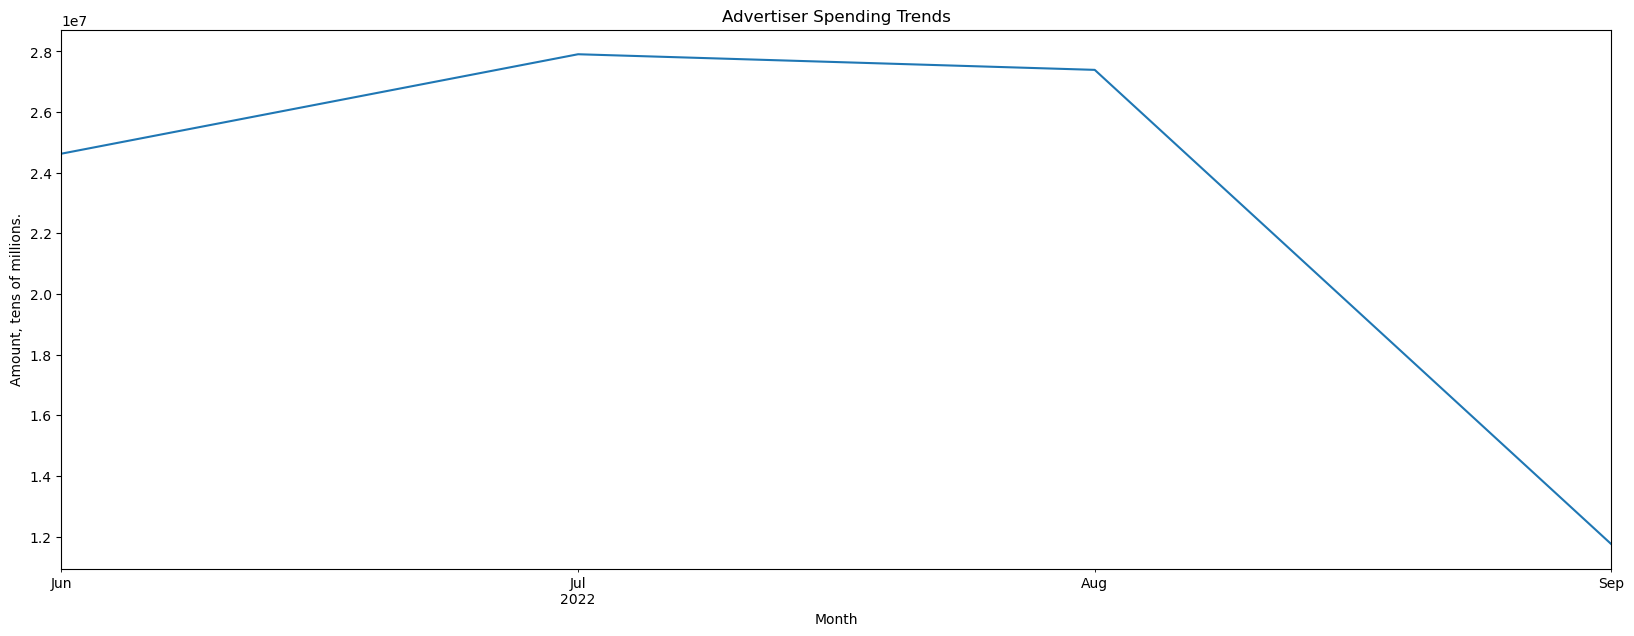

In [8]:
# Advertiser Spending Trends
cost_trend = (
    data_act
    .pivot_table(index='month', values='cost', aggfunc='sum')
    .plot(kind='line', 
          figsize=(20, 7), 
          legend=False,
          grid=False, 
          title='Advertiser Spending Trends',
          xlabel='Month',
          ylabel='Amount, tens of millions.',
          rot=0)
)

plt.show();

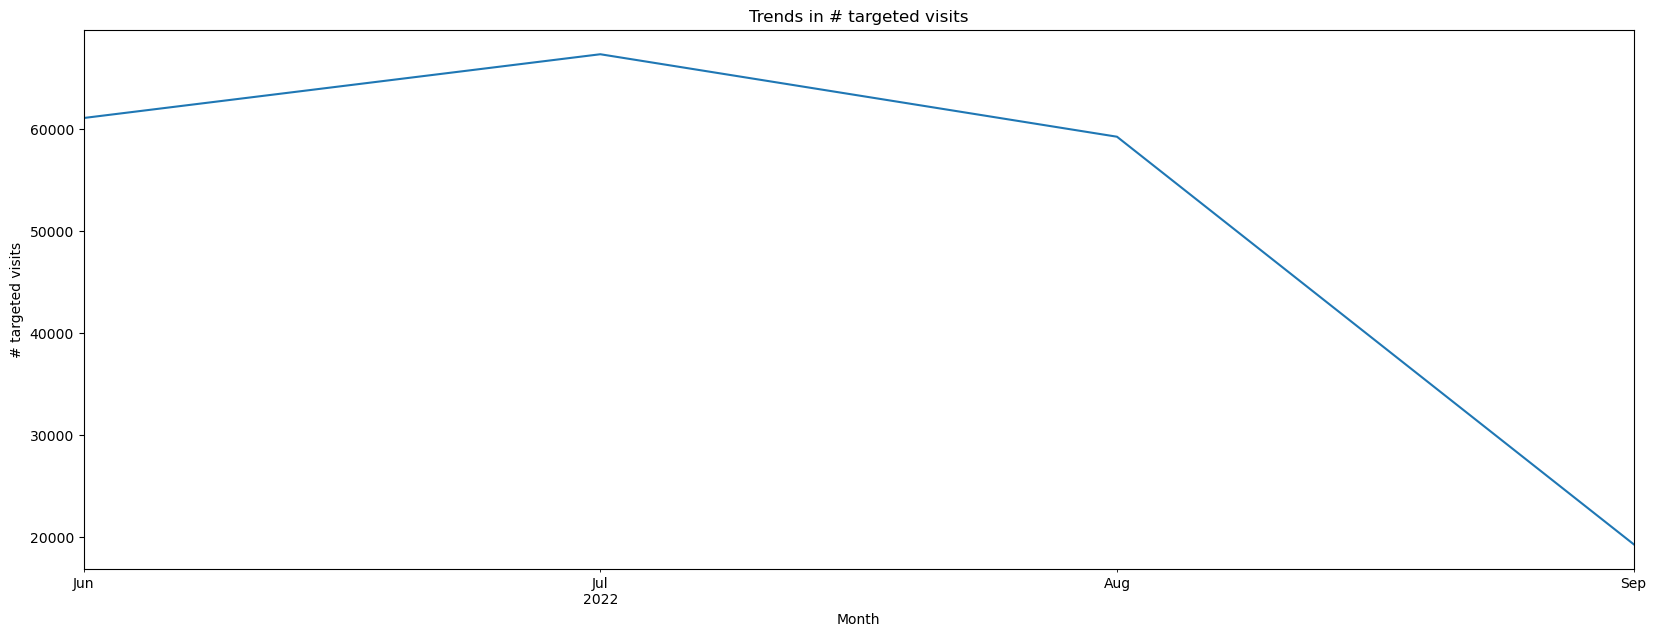

In [9]:
# Trends in absolute targeted visits
conversions_trend = (
    data_act
    .pivot_table(index='month', values='conversions', aggfunc='sum')
    .plot(kind='line', 
          figsize=(20, 7), 
          legend=False, 
          grid=False, 
          title='Trends in # targeted visits',
          xlabel='Month',
          ylabel='# targeted visits',
          rot=0)
)

plt.show();

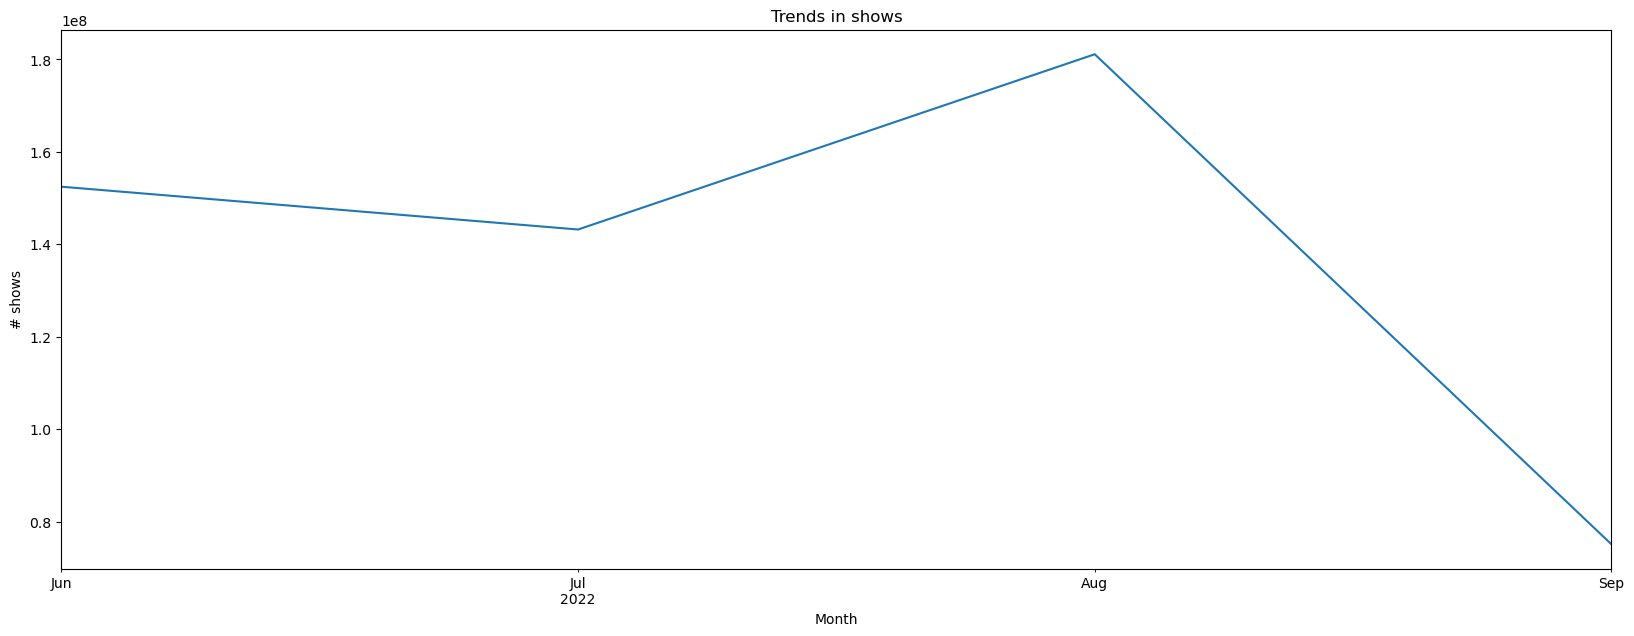

In [10]:
# Trends in shows
shows_trend = (
    data_act
    .pivot_table(index='month', values='shows', aggfunc='sum')
    .plot(kind='line', 
          figsize=(20, 7), 
          legend=False, 
          grid=False, 
          title='Trends in shows',
          xlabel='Month',
          ylabel='# shows',
          rot=0)
)

plt.show();

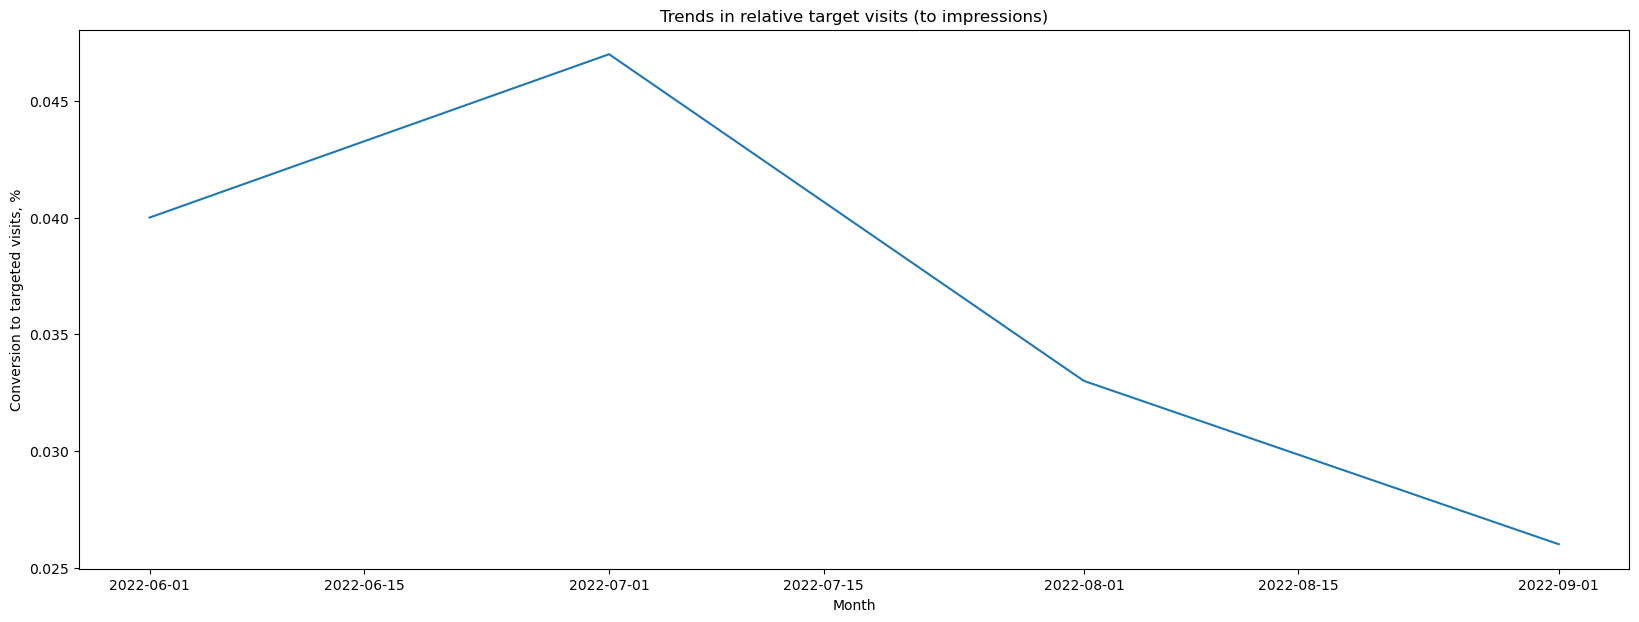

In [11]:
# Trends in relative target visits (to impressions)
conversions_per_shows_trend = (
    data_act
    .groupby(['month'], as_index=False)
    .agg({'shows': 'sum',
          'conversions': 'sum'})
)

conversions_per_shows_trend['%'] = round(conversions_per_shows_trend['conversions'] /
                                         conversions_per_shows_trend['shows'] * 100, 3)

plt.figure(figsize=(20, 7))

plt.plot(conversions_per_shows_trend['month'], 
         conversions_per_shows_trend['%'])

plt.title('Trends in relative target visits (to impressions)')
plt.ylabel('Conversion to targeted visits, %')
plt.xlabel('Month')

plt.show();

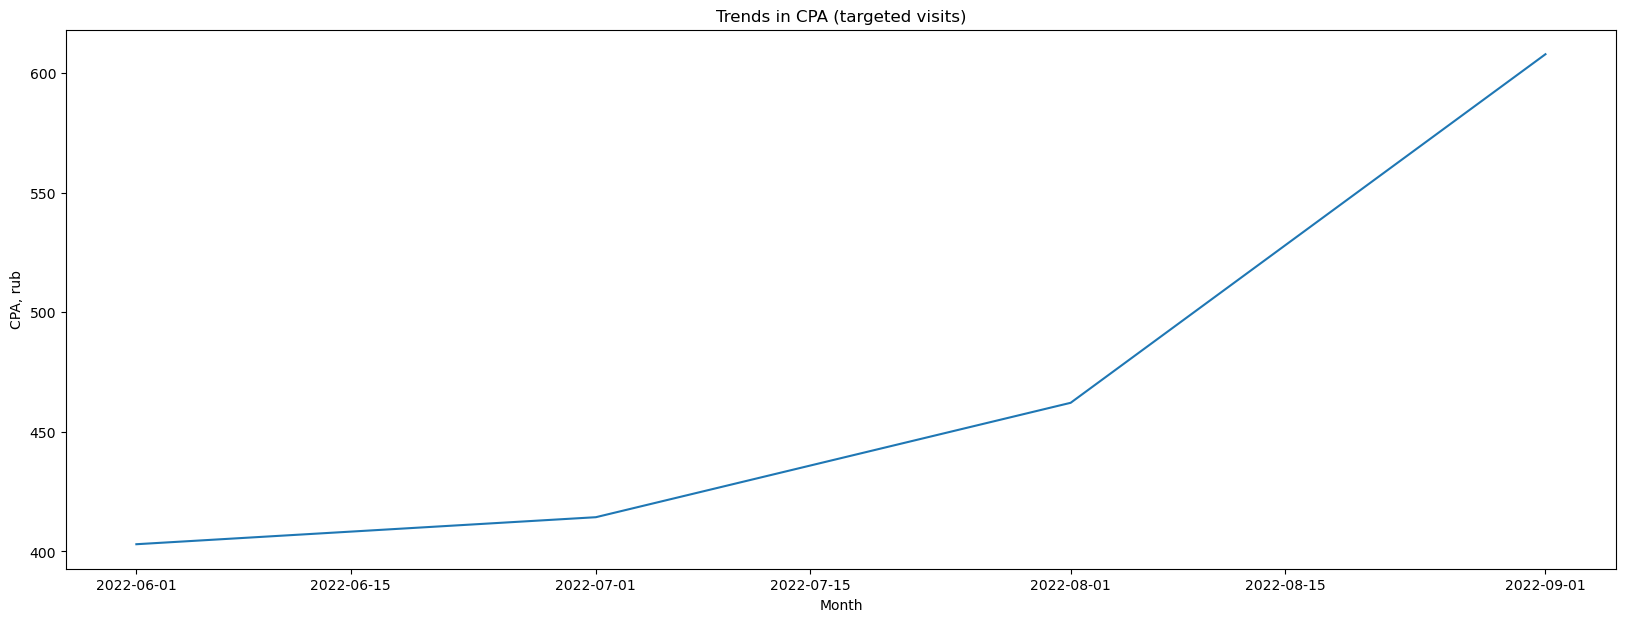

In [12]:
# Trends in CPA (targeted visits)
cpa_trend = (
    data_act
    .groupby(['month'], as_index=False)
    .agg({'cost': 'sum',
          'conversions': 'sum'})
)

cpa_trend['cpa'] = cpa_trend['cost'] / cpa_trend['conversions']

plt.figure(figsize=(20, 7))

plt.plot(cpa_trend['month'], 
         cpa_trend['cpa'])

plt.title('Trends in CPA (targeted visits)')
plt.ylabel('CPA, rub')
plt.xlabel('Month')

plt.show();

**Conclusions to general trends**:

- Advertiser spending remained approximately at the level of `24-28 million rubles` in June-August 2022 with a peak in July, but dropped sharply in September to `17 million rubles`

- A synchronous trend is observed in targeted visits: stability at the level of approximately '59-67 thousand visits' in June-August with a peak in July, and a sharp decrease in targeted visits in September to '19 thousand'

- In September there was also a sharp drop in the number of impressions from the level of `143-152 million` to `75 million`.

- There is an ambiguous trend in targeted visits to displays: there was an increase in the metric from `0.04%` in June to `0.047%` in July, and then a decrease until September until `0.026%`.

- CPA is growing throughout the entire observation period: from `403` in June to `608 rubles` in September.

- The general trend from June to September: decrease in costs, drop in targeted visits and advertising impressions, with simultaneous increase in the cost of targeted action.

<a id="factors"></a> 


## 3) Factors investigations

Let's divide the data into subgroups depending on factors that can influence CPA, such as

- device (column `Device`),

- type of site (column `Place`),

- ad type (column `BannerType`),

- query type (column `QueryType`) and

- targeting type (column `TargetingType`).

Let's analyze each subgroup separately and compare their CPA performance.

In [13]:
# Function for calculating and displaying CPA in terms of the required criteria
def calculate_show_cpa(group, data=data_act):
    
    # Dividing data into subgroups depending on the device type factor
    cpa = (
        data_act
        .groupby([group, 'month'], as_index=False)
        .agg({'conversions': 'sum',
              'cost': 'sum'})
    )
    
    # CPA calculation
    cpa['CPA'] = round(cpa['cost'] / cpa['conversions'], 4)
    
    # CPA visualization
    plt.figure(figsize=(20, 7))
    
    cpa_plot = sns.lineplot(data=cpa, x='month', y='CPA', hue=group)
        
    plt.title('CPA trend by {}'.format(group))
    plt.ylabel('CPA')
    plt.xlabel('Month')
    plt.legend(prop={"size": 20}, loc="lower right")
    
    plt.show();

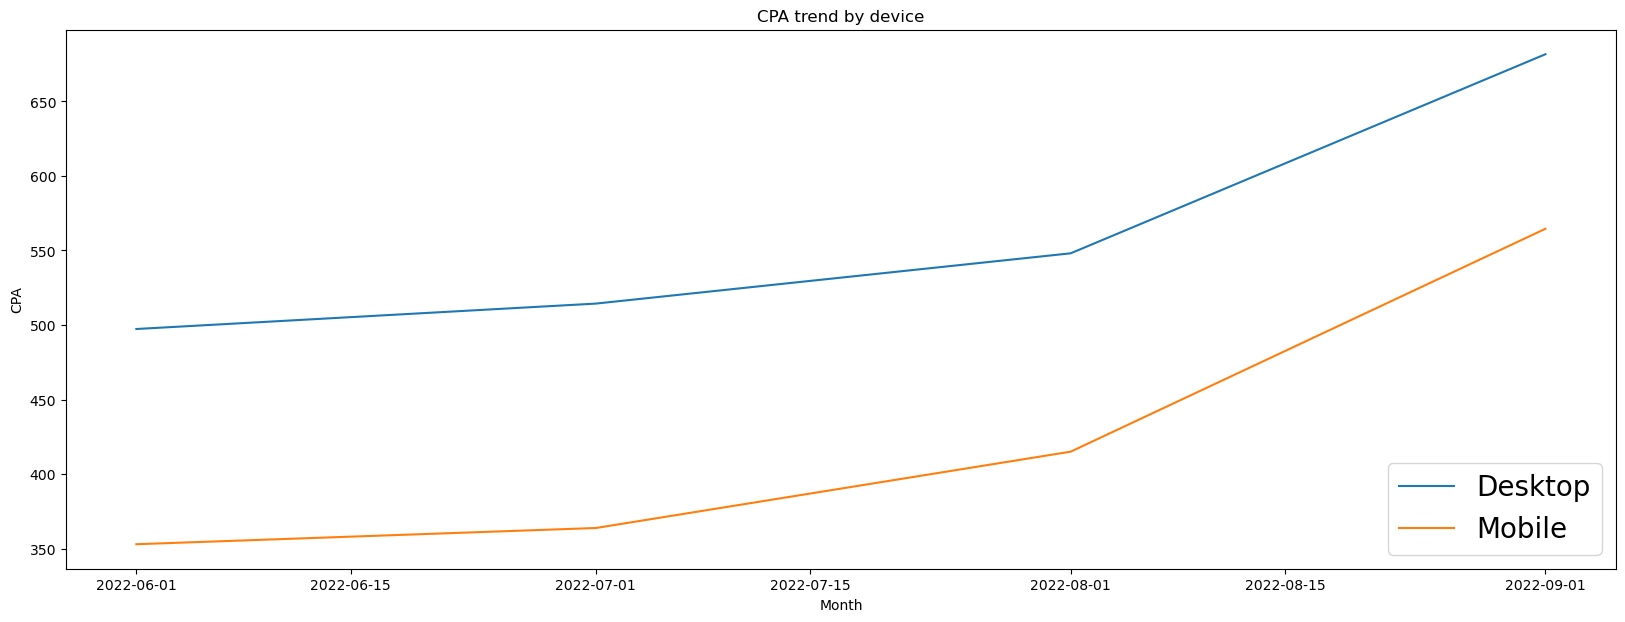

In [14]:
# CPA by device
calculate_show_cpa('device')

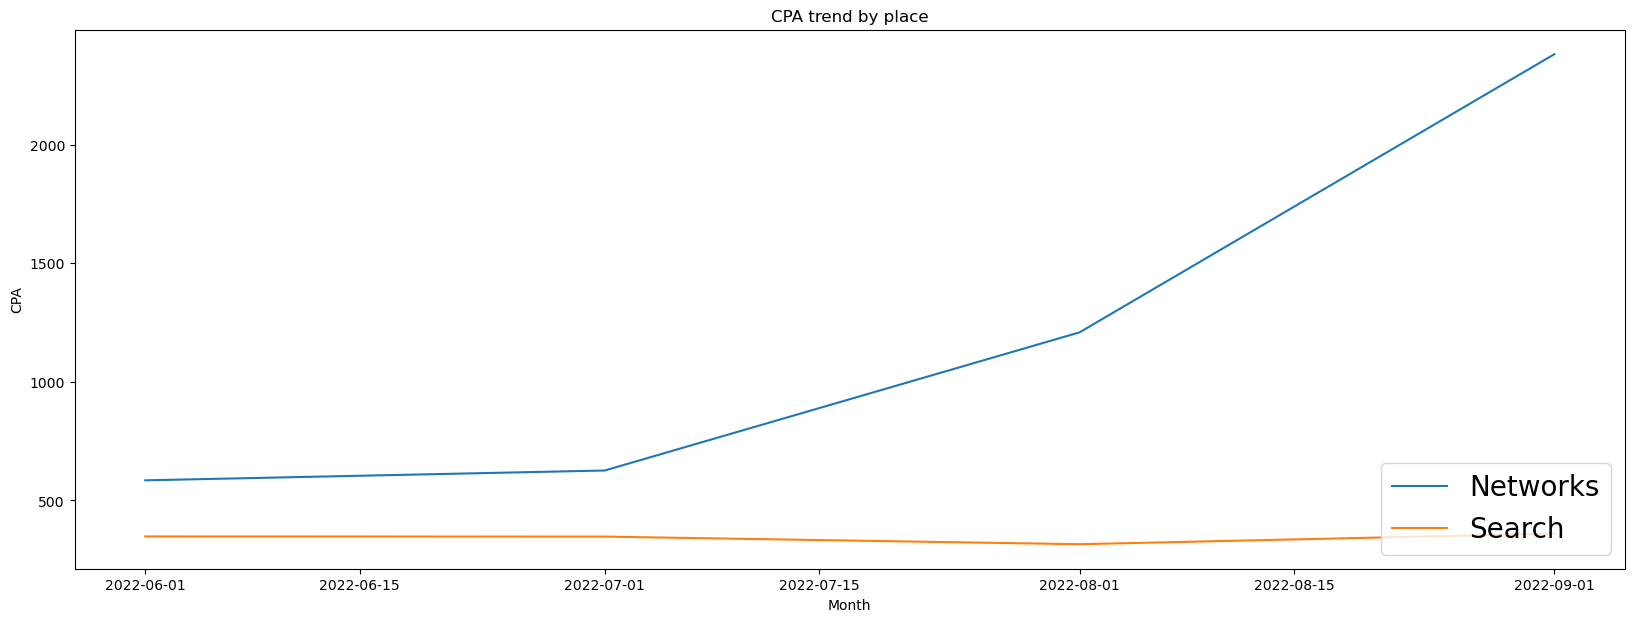

In [15]:
# CPA by place
calculate_show_cpa('place')

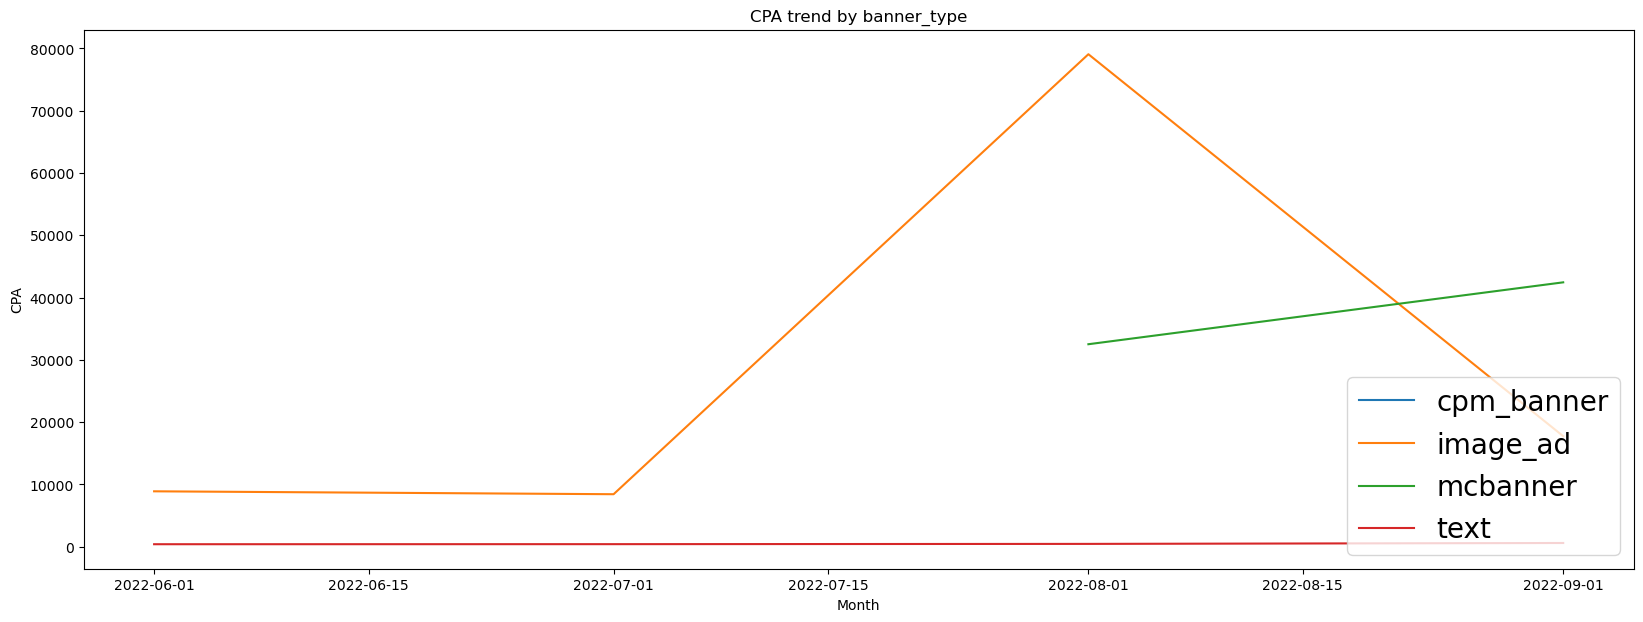

In [16]:
# CPA by banner type
calculate_show_cpa('banner_type')

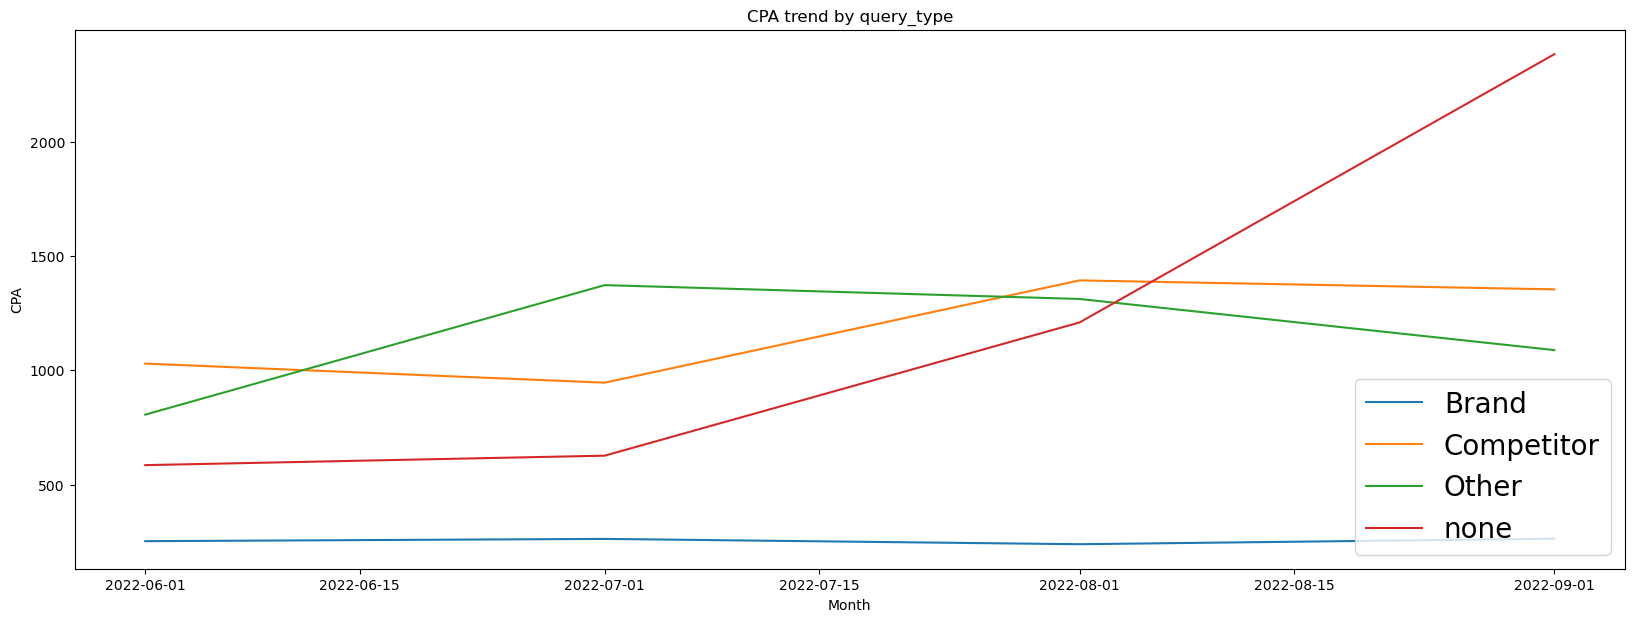

In [17]:
# CPA by query type
calculate_show_cpa('query_type')

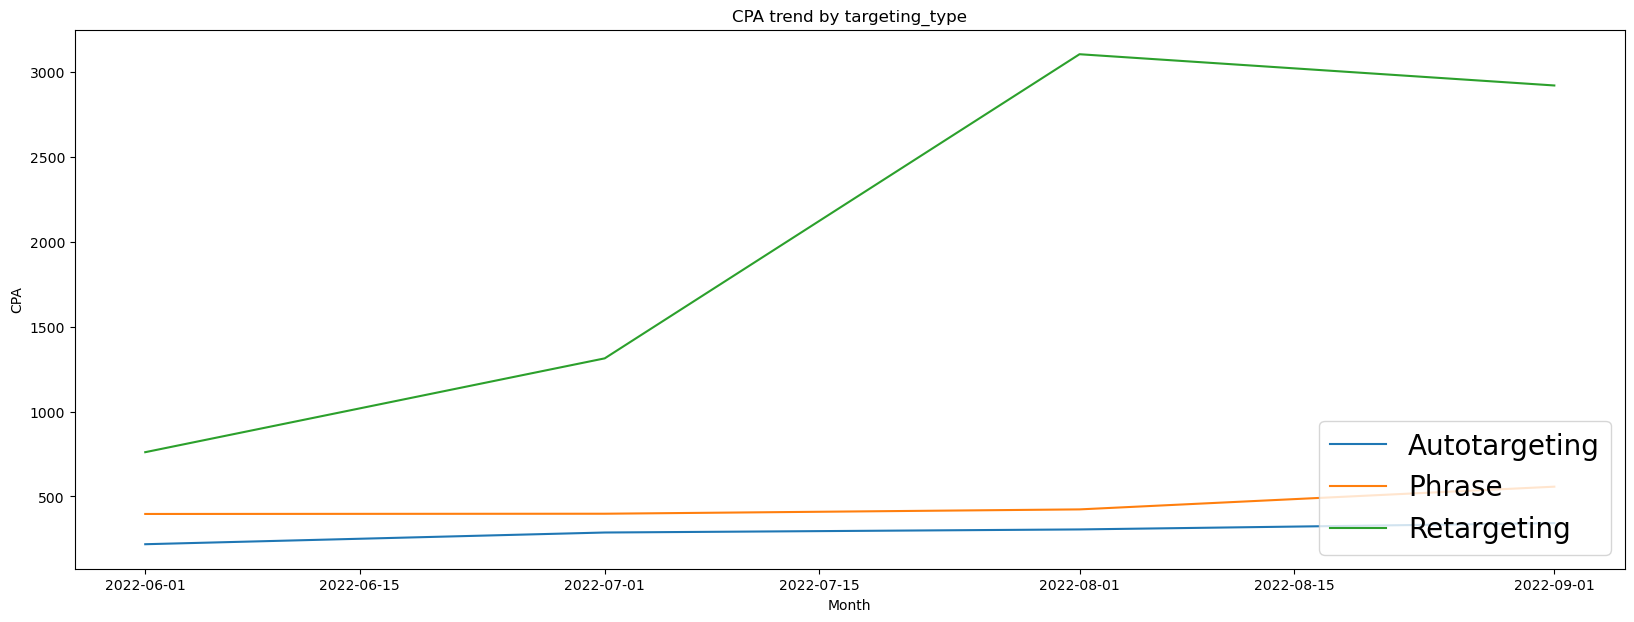

In [18]:
# CPA by targeting type
calculate_show_cpa('targeting_type')

**Conclusions on CPA by main factors**:

- CPA by device for mobile and desktop devices is growing synchronously throughout the entire period. At the same time, desktop users are consistently ~150 rubles more expensive than mobile users. Over three months of observation, the CPA metric for each type of device increased by approximately 200 rubles (for Desktop - an increase from `497.35 rubles` to `681.65 rubles`; for Mobile - an increase from `352.98 rubles` to `564.58 rubles`). So the problem with CPA metric growth is probably **not device type**.

- CPA by site and by channel type is growing significantly for Networks (the sharp increase since the beginning of August is especially noticeable), while for Search the CPA metric remains quite stable and is below the target level of 380 rubles. throughout the entire period. By the end of the period for Networks, CPA increases almost 4 times (from `585.06` to `2382.06` rubles). so the problem is most likely **with the Networks site**.

- CPA in terms of ad types is very high throughout the entire period (`10,000 - 80,000 rubles`). At the same time, image_ad increases sharply in August. Probably the problem with CPA growth is low conversion **by ad types**.

- CPA in terms of request types remains consistently low for the Brand type (CPA about `250 rub.`), but other requests undergo fluctuations and remain high (CPA `800-1300 rub.`) throughout the entire period. The request type None (that is, a request not via Yandex.Direct) is growing noticeably throughout the entire observation period. The problem with CPA growth is probably **query type**.

- CPA in terms of targeting types is almost not growing for Phrase and Autotargeting; is growing significantly for Retargeting. Despite the fact that for all types of targeting CPA is higher than necessary, perhaps the problem with CPA growth lies **in the targeting type** Retargeting.

<a id="factor_CPA_influence"></a> 

## 4) Assessing the influence of factors on CPA

Let's use the statistical method of analysis of variance (ANOVA) to determine which factors have the greatest impact on CPA.

For the ANOVA test, we will generate all possible combinations for the columns we are interested in (the order is not important, no repetitions): `device`, `place`, `banner_type`, `query_type`, `targeting_type`.

In [19]:
# The columns we are interested in are stored in cols
cols = ['device', 'place', 'banner_type', 'query_type', 'targeting_type']

# Counting future tests
cnt = 0

# All possible combinations for columns from cols
for c in range(len(cols) + 1):
    for subset in itertools.combinations(cols, c):
        
        # Special output format
        if len(cols) > len(subset) > 0:
            cnt += 1
            print('C(', end='')
            print(*subset, sep='):C(', end=') +\n')
        
        elif len(subset) == len(cols):
            cnt += 1
            print('C(', end='')
            print(*subset, sep='):C(', end=')')

C(device) +
C(place) +
C(banner_type) +
C(query_type) +
C(targeting_type) +
C(device):C(place) +
C(device):C(banner_type) +
C(device):C(query_type) +
C(device):C(targeting_type) +
C(place):C(banner_type) +
C(place):C(query_type) +
C(place):C(targeting_type) +
C(banner_type):C(query_type) +
C(banner_type):C(targeting_type) +
C(query_type):C(targeting_type) +
C(device):C(place):C(banner_type) +
C(device):C(place):C(query_type) +
C(device):C(place):C(targeting_type) +
C(device):C(banner_type):C(query_type) +
C(device):C(banner_type):C(targeting_type) +
C(device):C(query_type):C(targeting_type) +
C(place):C(banner_type):C(query_type) +
C(place):C(banner_type):C(targeting_type) +
C(place):C(query_type):C(targeting_type) +
C(banner_type):C(query_type):C(targeting_type) +
C(device):C(place):C(banner_type):C(query_type) +
C(device):C(place):C(banner_type):C(targeting_type) +
C(device):C(place):C(query_type):C(targeting_type) +
C(device):C(banner_type):C(query_type):C(targeting_type) +
C(place)

We received all possible combinations with the necessary formatting.

We will consider a p-value to be statistically significant when it reaches the critical significance level of `0.05`. Because there will be multiple tests performed in an ANOVA test, it is necessary to adjust for multiple comparisons. Let's make a Bonferroni correction: divide the critical significance level alpha by the number of tests performed.

In [20]:
# Significance level
alpha = 0.05

# Bonferroni correction (for multiple-comparison)
round(alpha / cnt, 4)

0.0016

Thus, a result less than 0.0016 will be statistically significant.

We can move on to analysis of variances.

In [21]:
# ANOVA
lm = sfa.ols('''conversions ~ 
C(device) +
C(place) +
C(banner_type) +
C(query_type) +
C(targeting_type) +
C(device):C(place) +
C(device):C(banner_type) +
C(device):C(query_type) +
C(device):C(targeting_type) +
C(place):C(banner_type) +
C(place):C(query_type) +
C(place):C(targeting_type) +
C(banner_type):C(query_type) +
C(banner_type):C(targeting_type) +
C(query_type):C(targeting_type) +
C(device):C(place):C(banner_type) +
C(device):C(place):C(query_type) +
C(device):C(place):C(targeting_type) +
C(device):C(banner_type):C(query_type) +
C(device):C(banner_type):C(targeting_type) +
C(device):C(query_type):C(targeting_type) +
C(place):C(banner_type):C(query_type) +
C(place):C(banner_type):C(targeting_type) +
C(place):C(query_type):C(targeting_type) +
C(banner_type):C(query_type):C(targeting_type) +
C(device):C(place):C(banner_type):C(query_type) +
C(device):C(place):C(banner_type):C(targeting_type) +
C(device):C(place):C(query_type):C(targeting_type) +
C(device):C(banner_type):C(query_type):C(targeting_type) +
C(place):C(banner_type):C(query_type):C(targeting_type) +
C(device):C(place):C(banner_type):C(query_type):C(targeting_type)
''', data=data_act).fit()

anova = sa.stats.anova_lm(lm, typ=1)
print(anova)

                                                       df        sum_sq  \
C(device)                                             1.0  1.137970e+07   
C(place)                                              1.0  2.306838e+07   
C(banner_type)                                        3.0  1.342471e+07   
C(query_type)                                         3.0  2.252112e+08   
C(targeting_type)                                     2.0  3.479532e+07   
C(device):C(place)                                    1.0  1.371775e+06   
C(device):C(banner_type)                              3.0  1.517834e+06   
C(device):C(query_type)                               3.0  1.800823e+07   
C(device):C(targeting_type)                           2.0  3.823795e+06   
C(place):C(banner_type)                               3.0  2.122756e+05   
C(place):C(query_type)                                3.0  1.484854e+06   
C(place):C(targeting_type)                            2.0  7.614034e+06   
C(banner_type):C(query_ty

From the results of ANOVA adjusted for multiple comparisons, we see that the greatest impact on CPA growth is exerted by:

1) Factor `query_type` - p-value (PR(>F)) = 2.128614e-15;

2) Combination of factors `banner_type`, `query_type` and `targeting_type` - p-value = 3.303457e-11;

3) Combination of factors `device`, `place`, `banner_type` and `targeting_type` - p-value = 2.413777e-11;

4) Combination of factors `place`, `banner_type` и `targeting_type`- p-value = 5.220704e-10;

Since it is usually unwise to interpret the main effect of A when this effect is also involved in the A:B interaction, we immediately exclude from the output the single factor 1) `query_type` and combinations and 2) `place`, `banner_type` and `targeting_type`, since These factors and combinations occur in other statistically significant results and are likely dependent on each other.

What we need to understand then is what exact combinations of features give an increase in CPA. It is necessary to separate the data sets and continue to analyze the factor levels of each data set separately. The choice of factors can be arbitrary, but it will be useful to separate the data for each variable and evaluate the result.

In [22]:
# Function to perform analysis of variance for each factor
def anova_for_factor(factor, cols, data=data_act, alpha=0.05):
    
    # Calculation of future tests to correct for multiple comparisons
    cnt = 0
    
    # String with a set of factors for ANOVA
    string = '''conversions ~ '''
    
    # Display all possible combinations for factors from cols
    for c in range(len(cols) + 1):
        for subset in itertools.combinations(cols, c):
            
            # Special formatting for cases where there is only one factor in combination
            if len(subset) == 1:
                cnt += 1
                string += 'C('
                for s in subset:
                    string += s
                string += ') +\n'
            
            # Special formatting for cases where there is more than 1 factor 
            # in a combination, but not the maximum number
            elif len(cols) > len(subset) > 0:
                cnt += 1
                string += 'C('
                for s in subset:
                    if subset.index(s) < len(subset) - 1:
                        string += s
                        string += '):C('
                    else:
                        string += s
                string += ') +\n'
            
            # Special formatting for cases where the combination of factors 
            # has a maximum number (equal to the length of the sheet cols)
            elif len(subset) == len(cols):
                cnt += 1
                string += 'C('
                for s in subset:
                    if subset.index(s) < len(subset) - 1:
                        string += s
                        string += '):C('
                    else:
                        string += s
                string += ')'
     
    
    # Bonferroni correction
    p_val = alpha / cnt
        
    print('p-value adjusted for multiple comparisons:', round(p_val, 4), '\n')
    
    
    # ANOVA is performed separately for each feature in the factor column
    all_factors = list(data_act[factor].unique())
    
    for i in range(len(all_factors)):
        data = data_act[data_act[factor] == all_factors[i]]
                     
        # ANOVA  
        print('{0}) ANOVA for {1} = {2}\n'.format(i+1, factor, all_factors[i]))
        
        lm = sfa.ols(string, data=data).fit()
        anova = sa.stats.anova_lm(lm, typ=1)
        
                
        print(anova['PR(>F)'], 
              sep='\n\n', 
              end='\n\n*******************************************************************\n\n')
        

**1) Let's divide the data by the `banner_type` feature and run an ANOVA test for the remaining features.**

In [23]:
# Using the custom anova_for_factor function for the banner_type attribute
anova_for_factor('banner_type', ['device', 'place', 'query_type', 'targeting_type'])

p-value adjusted for multiple comparisons: 0.0033 

1) ANOVA for banner_type = image_ad

C(device)                                             0.979698
C(place)                                                   NaN
C(query_type)                                              NaN
C(targeting_type)                                     0.017227
C(device):C(place)                                         NaN
C(device):C(query_type)                                    NaN
C(device):C(targeting_type)                           0.432770
C(place):C(query_type)                                     NaN
C(place):C(targeting_type)                                 NaN
C(query_type):C(targeting_type)                            NaN
C(device):C(place):C(query_type)                           NaN
C(device):C(place):C(targeting_type)                       NaN
C(device):C(query_type):C(targeting_type)                  NaN
C(place):C(query_type):C(targeting_type)                   NaN
C(device):C(place):C(query_ty

We obtained the result of testing for equality of variances for four types of ads. A statistically significant result was obtained only for `text` and `query_type` (p-value = `7.005870e-14`, which is less than alpha adjusted for multiple comparisons = 0.003).

**2) Let's divide the data according to the `banner_type` (`text`) and `query_type` characteristics, and conduct an ANOVA test for the remaining characteristics.**

In [24]:
# Data with banner_type == text
banner_type_text = data_act[data_act['banner_type'] == 'text']

In [25]:
# Using the custom anova_for_factor function for the banner_type and query_type attributes
anova_for_factor('query_type', ['device', 'place', 'targeting_type'], data=banner_type_text)

p-value adjusted for multiple comparisons: 0.0071 

1) ANOVA for query_type = none

C(device)                               0.056861
C(place)                                     NaN
C(targeting_type)                       0.000039
C(device):C(place)                           NaN
C(device):C(targeting_type)             0.209751
C(place):C(targeting_type)                   NaN
C(device):C(place):C(targeting_type)         NaN
Residual                                     NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for query_type = Brand

C(device)                               0.190018
C(place)                                     NaN
C(targeting_type)                       0.043287
C(device):C(place)                           NaN
C(device):C(targeting_type)             0.563087
C(place):C(targeting_type)                   NaN
C(device):C(place):C(targeting_type)         NaN
Residual                                     NaN


We received the result of testing for equality of variances for the ad type - `text`, since it showed a statistically significant result last time, and for the query type `query_type`. A statistically significant result was obtained for query type `none`: `targeting_type` (p-value = `0.000039`, which is less than alpha adjusted for multiple comparisons = 0.0071).

**3) Let's divide the data according to the characteristics `banner_type` (`text`), `query_type` (`none`) and `targeting_type`, and conduct an ANOVA test for the remaining characteristics.**

In [26]:
# Data with banner_type == text and query_type == none
banner_type_text_query_type_none = data_act.loc[(data_act['banner_type'] == 'text') & (data_act['query_type'] == 'none')]

In [27]:
# Using the self-written function anova_for_factor for the banner_type, query_type, targeting_type attributes
anova_for_factor('targeting_type', ['device', 'place'], data=banner_type_text_query_type_none)

p-value adjusted for multiple comparisons: 0.0167 

1) ANOVA for targeting_type = Phrase

C(device)             0.103536
C(place)              0.167770
C(device):C(place)    0.808387
Residual                   NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for targeting_type = Retargeting

C(device)             0.351739
C(place)                   NaN
C(device):C(place)         NaN
Residual                   NaN
Name: PR(>F), dtype: float64

*******************************************************************

3) ANOVA for targeting_type = Autotargeting

C(device)             0.462295
C(place)              0.328947
C(device):C(place)    0.794039
Residual                   NaN
Name: PR(>F), dtype: float64

*******************************************************************



We received the result of testing for equality of variances for the ad type `text` and for the request type `none`, since they showed statistically significant results last time, and for the targeting types `targeting_type`. None of the targeting types showed statistically significant differences.

**Conclusion**: CPA is affected by the ad type `text` and the request type `none`.

**4) Let's divide the data by the `device` feature and run an ANOVA test for the remaining features.**

In [28]:
# Using the custom anova_for_factor function for the device attribute
anova_for_factor('device', ['place', 'banner_type', 'targeting_type', 'query_type'])

p-value adjusted for multiple comparisons: 0.0033 

1) ANOVA for device = Desktop

C(place)                                                   1.926385e-02
C(banner_type)                                             4.839805e-01
C(targeting_type)                                          3.240164e-03
C(query_type)                                              6.512083e-08
C(place):C(banner_type)                                    9.854390e-01
C(place):C(targeting_type)                                 9.902753e-01
C(place):C(query_type)                                     9.970908e-01
C(banner_type):C(targeting_type)                           9.412329e-01
C(banner_type):C(query_type)                               9.394967e-01
C(targeting_type):C(query_type)                            2.976462e-02
C(place):C(banner_type):C(targeting_type)                  5.556613e-07
C(place):C(banner_type):C(query_type)                      1.748090e-06
C(place):C(targeting_type):C(query_type)             

We received the result of testing for equality of variances for the device type. Statistically significant results were obtained for:

Device type `Desktop`

- `targeting_type` (p-value = 3.240164e-03, which is less than alpha = 0.003);
- `query_type` (p-value = 6.512083e-08);
- combinations of factors `place`, `banner_type` and `targeting_type` (p-value = 5.556613e-07);
- combinations of factors `place`, `banner_type` and `query_type` (p-value = 1.748090e-06).


Device type `Mobile`:

- `targeting_type` (p-value = 2.914371e-03, which is less than alpha = 0.003);
- `query_type` (p-value = 2.701697e-07);
- combinations of factors `place`, `banner_type` and `query_type` (p-value = 5.532307e-05);
- combinations of factors `banner_type`, `targeting_type` and `query_type` (p-value = 2.252862e-09).

**5) Let's divide the data according to the characteristics `device` and `place` and conduct an ANOVA test for the remaining characteristics.**

In [29]:
# Data separated by device factor
device_desktop = data_act[data_act['device'] == 'Desktop']
device_mobile = data_act[data_act['device'] == 'Mobile']

In [30]:
# Using the self-written function anova_for_factor for the place and device == Desktop attribute
anova_for_factor('place', ['banner_type', 'targeting_type', 'query_type'], data=device_desktop)

p-value adjusted for multiple comparisons: 0.0071 

1) ANOVA for place = Networks

C(banner_type)                                    0.002298
C(targeting_type)                                 0.000008
C(query_type)                                          NaN
C(banner_type):C(targeting_type)                  0.196099
C(banner_type):C(query_type)                           NaN
C(targeting_type):C(query_type)                        NaN
C(banner_type):C(targeting_type):C(query_type)         NaN
Residual                                               NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for place = Search

C(banner_type)                                    1.937898e-01
C(targeting_type)                                 8.743639e-04
C(query_type)                                     4.053590e-09
C(banner_type):C(targeting_type)                  8.982004e-01
C(banner_type):C(query_type)                      2.437926e-01
C(

In [31]:
# Using the custom anova_for_factor function for the place and device == Mobile
anova_for_factor('place', ['banner_type', 'targeting_type', 'query_type'], data=device_mobile)

p-value adjusted for multiple comparisons: 0.0071 

1) ANOVA for place = Networks

C(banner_type)                                    0.002298
C(targeting_type)                                 0.000008
C(query_type)                                          NaN
C(banner_type):C(targeting_type)                  0.196099
C(banner_type):C(query_type)                           NaN
C(targeting_type):C(query_type)                        NaN
C(banner_type):C(targeting_type):C(query_type)         NaN
Residual                                               NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for place = Search

C(banner_type)                                    1.937898e-01
C(targeting_type)                                 8.743639e-04
C(query_type)                                     4.053590e-09
C(banner_type):C(targeting_type)                  8.982004e-01
C(banner_type):C(query_type)                      2.437926e-01
C(

We received the result of testing for equality of variances for device types and site types. Equally statistically significant results were obtained for Mobile and Desktop device types for:

Platform type `Networks`:

- `banner_type` (p-value = 0.002298, which is less than alpha = 0.007);
- `targeting_type` (p-value = 0.000008);


Platform type `Search`:

- `targeting_type` (p-value = 8.743639e-04);
- `query_type` (p-value = 4.053590e-09);
- combination of factors `targeting_type` and `query_type` (p-value = 2.726993e-03).

**6) Let's divide the data by `device`, `place` and `banner_type`, and conduct an ANOVA test for the remaining characteristics.**

In [32]:
# Data separated by device and place factors
device_desktop_place_networks = data_act.loc[(data_act['device'] == 'Desktop') & (data_act['place'] == 'Networks')]
device_mobile_place_search = data_act.loc[(data_act['device'] == 'Mobile') & (data_act['place'] == 'Search')]
device_desktop_place_search = data_act.loc[(data_act['device'] == 'Desktop') & (data_act['place'] == 'Search')]
device_mobile_place_networks = data_act.loc[(data_act['device'] == 'Mobile') & (data_act['place'] == 'Networks')]

In [33]:
# Using the custom function anova_for_factor
anova_for_factor('banner_type', ['targeting_type', 'query_type'], data=device_desktop_place_networks)

p-value adjusted for multiple comparisons: 0.0167 

1) ANOVA for banner_type = image_ad

C(targeting_type)                  0.014141
C(query_type)                           NaN
C(targeting_type):C(query_type)         NaN
Residual                                NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for banner_type = text

C(targeting_type)                  2.707217e-05
C(query_type)                      2.213054e-12
C(targeting_type):C(query_type)    3.071464e-03
Residual                                    NaN
Name: PR(>F), dtype: float64

*******************************************************************

3) ANOVA for banner_type = cpm_banner

C(targeting_type)                 NaN
C(query_type)                     NaN
C(targeting_type):C(query_type)   NaN
Residual                          NaN
Name: PR(>F), dtype: float64

*******************************************************************

4) ANOVA for banner_ty

In [34]:
# Using the custom function anova_for_factor
anova_for_factor('banner_type', ['targeting_type', 'query_type'], data=device_mobile_place_search)

p-value adjusted for multiple comparisons: 0.0167 

1) ANOVA for banner_type = image_ad

C(targeting_type)                  0.014141
C(query_type)                           NaN
C(targeting_type):C(query_type)         NaN
Residual                                NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for banner_type = text

C(targeting_type)                  2.707217e-05
C(query_type)                      2.213054e-12
C(targeting_type):C(query_type)    3.071464e-03
Residual                                    NaN
Name: PR(>F), dtype: float64

*******************************************************************

3) ANOVA for banner_type = cpm_banner

C(targeting_type)                 NaN
C(query_type)                     NaN
C(targeting_type):C(query_type)   NaN
Residual                          NaN
Name: PR(>F), dtype: float64

*******************************************************************

4) ANOVA for banner_ty

In [35]:
# Using the custom function anova_for_factor
anova_for_factor('banner_type', ['targeting_type', 'query_type'], data=device_desktop_place_search)

p-value adjusted for multiple comparisons: 0.0167 

1) ANOVA for banner_type = image_ad

C(targeting_type)                  0.014141
C(query_type)                           NaN
C(targeting_type):C(query_type)         NaN
Residual                                NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for banner_type = text

C(targeting_type)                  2.707217e-05
C(query_type)                      2.213054e-12
C(targeting_type):C(query_type)    3.071464e-03
Residual                                    NaN
Name: PR(>F), dtype: float64

*******************************************************************

3) ANOVA for banner_type = cpm_banner

C(targeting_type)                 NaN
C(query_type)                     NaN
C(targeting_type):C(query_type)   NaN
Residual                          NaN
Name: PR(>F), dtype: float64

*******************************************************************

4) ANOVA for banner_ty

In [36]:
# Using the custom function anova_for_factor
anova_for_factor('banner_type', ['targeting_type', 'query_type'], data=device_mobile_place_networks)

p-value adjusted for multiple comparisons: 0.0167 

1) ANOVA for banner_type = image_ad

C(targeting_type)                  0.014141
C(query_type)                           NaN
C(targeting_type):C(query_type)         NaN
Residual                                NaN
Name: PR(>F), dtype: float64

*******************************************************************

2) ANOVA for banner_type = text

C(targeting_type)                  2.707217e-05
C(query_type)                      2.213054e-12
C(targeting_type):C(query_type)    3.071464e-03
Residual                                    NaN
Name: PR(>F), dtype: float64

*******************************************************************

3) ANOVA for banner_type = cpm_banner

C(targeting_type)                 NaN
C(query_type)                     NaN
C(targeting_type):C(query_type)   NaN
Residual                          NaN
Name: PR(>F), dtype: float64

*******************************************************************

4) ANOVA for banner_ty

We received the result of testing for equality of variances for device types, site types and ad types. We found equally statistically significant results for the `text` ad type only:

- `targeting_type` (p-value = 2.707217e-05, which is lower than alpha = 0.0167);
- `query_type` (p-value = 2.213054e-12);
- combinations of features `targeting_type` and `query_type` (p-value = 5.581209e-03).

Statistically significant results were also obtained for `image_ad` (p-value = 0.014141).

**7) Let's divide the data according to the characteristics `device`, `place` and `banner_type` (`text`) and `targeting_type`, and conduct an ANOVA test for the remaining characteristics.**

To do this, we also determine whether these subgroups exist.

In [37]:
# Checking for a non-empty set
print(data_act.loc[(data_act['device'] == 'Mobile') &
             (data_act['place'] == 'Search') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Phrase')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Mobile') &
             (data_act['place'] == 'Search') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Retargeting')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Mobile') &
             (data_act['place'] == 'Search') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Autotargeting')]['query_type'].unique())
print()
print(data_act.loc[(data_act['device'] == 'Desktop') &
             (data_act['place'] == 'Networks') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Phrase')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Desktop') &
             (data_act['place'] == 'Networks') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Retargeting')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Desktop') &
             (data_act['place'] == 'Networks') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Autotargeting')]['query_type'].unique())
print()
print(data_act.loc[(data_act['device'] == 'Mobile') &
             (data_act['place'] == 'Networks') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Phrase')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Mobile') &
             (data_act['place'] == 'Networks') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Retargeting')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Mobile') &
             (data_act['place'] == 'Networks') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Autotargeting')]['query_type'].unique())
print()
print(data_act.loc[(data_act['device'] == 'Desktop') &
             (data_act['place'] == 'Search') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Phrase')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Desktop') &
             (data_act['place'] == 'Search') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Retargeting')]['query_type'].unique())

print(data_act.loc[(data_act['device'] == 'Desktop') &
             (data_act['place'] == 'Search') &
             (data_act['banner_type'] == 'text') &
             (data_act['targeting_type'] == 'Autotargeting')]['query_type'].unique())

['Brand' 'Competitor' 'Other']
[]
['Brand' 'Competitor' 'Other']

['none']
['none']
['none']

['none']
['none']
['none']

['Brand' 'Competitor' 'Other']
[]
['Brand' 'Competitor' 'Other']


It makes sense to conduct a test for equality of variances for:
 
- device type `Mobile`, site type `Search`, banner type `text` and targeting type `Phrase`;
- device type `Mobile`, site type `Search`, banner type `text` and targeting type `Autotatgeting`;
- device type `Desktop`, site type `Search`, banner type `text` and targeting type `Phrase`;
- device type `Desktop`, site type `Search`, banner type `text` and targeting type `Autotatgeting`.

The remaining feature combinations either contain only one targeting type feature or do not contain any information.

In [38]:
# Data separated by device, place, banner_type and targeting_type
device_mobile_place_search_banner_type_text_targeting_type_phrase = data_act.loc[(data_act['device'] == 'Mobile') &
                                              (data_act['place'] == 'Search') &
                                              (data_act['banner_type'] == 'text') &
                                              (data_act['targeting_type'] == 'Phrase')]

device_mobile_place_search_banner_type_text_targeting_type_autotargeting = data_act.loc[(data_act['device'] == 'Mobile') &
                                              (data_act['place'] == 'Search') &
                                              (data_act['banner_type'] == 'text') &
                                              (data_act['targeting_type'] == 'Autotargeting')]

device_desktop_place_search_banner_type_text_targeting_type_phrase = data_act.loc[(data_act['device'] == 'Desktop') &
                                               (data_act['place'] == 'Search') &
                                               (data_act['banner_type'] == 'text') &
                                               (data_act['targeting_type'] == 'Phrase')]

device_desktop_place_search_banner_type_text_targeting_type_autotargeting = data_act.loc[(data_act['device'] == 'Desktop') &
                                               (data_act['place'] == 'Search') &
                                               (data_act['banner_type'] == 'text') &
                                               (data_act['targeting_type'] == 'Autotargeting')]

In [39]:
# Critical significance level adjusted for multiple comparisons
alpha = 0.05
alpha_bonf = alpha / 3
round(alpha_bonf, 4)

0.0167

In [40]:
# ANOVA for Mobile device type and Phrase targeting type
lm = sfa.ols('''conversions ~ 
C(query_type)
''', data=device_mobile_place_search_banner_type_text_targeting_type_phrase).fit()

anova = sa.stats.anova_lm(lm, typ=1)
print(anova['PR(>F)'])

# ANOVA for Mobile device type and Autotargeting targeting type
lm = sfa.ols('''conversions ~ 
C(query_type)
''', data=device_mobile_place_search_banner_type_text_targeting_type_autotargeting).fit()

anova = sa.stats.anova_lm(lm, typ=1)
print(anova['PR(>F)'])

C(query_type)    0.000086
Residual              NaN
Name: PR(>F), dtype: float64
C(query_type)    0.221606
Residual              NaN
Name: PR(>F), dtype: float64


In [41]:
# ANOVA for Desktop device type and Phrase targeting type
lm = sfa.ols('''conversions ~ 
C(query_type)
''', data=device_desktop_place_search_banner_type_text_targeting_type_phrase).fit()

anova = sa.stats.anova_lm(lm, typ=1)
print(anova['PR(>F)'])


# ANOVA for Desktop device type and Autotargeting targeting type
lm = sfa.ols('''conversions ~ 
C(query_type)
''', data=device_desktop_place_search_banner_type_text_targeting_type_autotargeting).fit()

anova = sa.stats.anova_lm(lm, typ=1)
print(anova['PR(>F)'])

C(query_type)    0.000061
Residual              NaN
Name: PR(>F), dtype: float64
C(query_type)    0.12216
Residual             NaN
Name: PR(>F), dtype: float64


We obtained a statistically significant result of testing for equality of variances for the device type `Mobile` and the targeting type `Phrase` (p-value = 0.000086, which is below the critical significance level alpha with Bonferroni correction 0.0167) and for the device type `Desktop` and the targeting type ` Phrase` (p-value = 0.000061).

Thus, final three-sample tests for equality of sample means (Student's t-test) can be performed for samples that differ in `query_type`.

**9) Let's conduct a 3-sample statistical test for equality of average samples (Student's t-test) for `query_type`.**

In [42]:
# Data separated by device, place, banner_type, targeting_type and query_type
device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_brand = data_act.loc[
    (data_act['device'] == 'Mobile') &
    (data_act['place'] == 'Search') &
    (data_act['banner_type'] == 'text') &
    (data_act['targeting_type'] == 'Phrase') &
    (data_act['query_type'] == 'Brand')]

device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_competitor = data_act.loc[
    (data_act['device'] == 'Mobile') &
    (data_act['place'] == 'Search') &
    (data_act['banner_type'] == 'text') &
    (data_act['targeting_type'] == 'Phrase') &
    (data_act['query_type'] == 'Competitor')]

device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_other = data_act.loc[
    (data_act['device'] == 'Mobile') &
    (data_act['place'] == 'Search') &
    (data_act['banner_type'] == 'text') &
    (data_act['targeting_type'] == 'Phrase') &
    (data_act['query_type'] == 'Other')]

In [43]:
# Critical significance level adjusted for multiple comparisons
alpha = 0.05
alpha_bonf = alpha / 3
round(alpha_bonf, 4)

0.0167

In [44]:
# Student's t-test for independent samples, where query_type == brand and competitor
results = ss.ttest_ind(device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_brand['conversions'], 
                       device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_competitor['conversions'])

# Resulting p-value
print('p-value:', '{0:.5f}'.format(results[1]))

p-value: 0.00140


In [45]:
# Student's t-test for independent samples, where query_type == brand and other
results = ss.ttest_ind(device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_brand['conversions'], 
                       device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_other['conversions'])

# Resulting p-value
print('p-value:', '{0:.5f}'.format(results[1]))

p-value: 0.00261


In [46]:
# Student t-test for independent samples, where query_type == competitor and other
results = ss.ttest_ind(device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_competitor['conversions'], 
                       device_mobile_place_search_banner_type_text_targeting_type_phrase_query_type_other['conversions'])

# Resulting p-value
print('p-value:', '{0:.5f}'.format(results[1]))

p-value: 0.32418


We obtained statistically significant differences for the `brand` request type, the average conversion for which is significantly different from other request types.

Let's conduct a Student's test for the `Desktop` device type.

In [47]:
# Data separated by device, place, banner_type, targeting_type and query_type
device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_brand = data_act.loc[
    (data_act['device'] == 'Desktop') &
    (data_act['place'] == 'Search') &
    (data_act['banner_type'] == 'text') &
    (data_act['targeting_type'] == 'Phrase') &
    (data_act['query_type'] == 'Brand')]

device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_competitor = data_act.loc[
    (data_act['device'] == 'Desktop') &
    (data_act['place'] == 'Search') &
    (data_act['banner_type'] == 'text') &
    (data_act['targeting_type'] == 'Phrase') &
    (data_act['query_type'] == 'Competitor')]

device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_other = data_act.loc[
    (data_act['device'] == 'Desktop') &
    (data_act['place'] == 'Search') &
    (data_act['banner_type'] == 'text') &
    (data_act['targeting_type'] == 'Phrase') &
    (data_act['query_type'] == 'Other')]

In [48]:
# Student's t-test for independent samples, where query_type == brand and competitor
results = ss.ttest_ind(device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_brand['conversions'], 
                       device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_competitor['conversions'])

# Resulting p-value
print('p-value:', '{0:.5f}'.format(results[1]))

p-value: 0.00086


In [49]:
# Student's t-test for independent samples, where query_type == brand and other
results = ss.ttest_ind(device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_brand['conversions'], 
                       device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_other['conversions'])

# Resulting p-value
print('p-value:', '{0:.5f}'.format(results[1]))

p-value: 0.00296


In [50]:
# Student t-test for independent samples, where query_type == competitor and other
results = ss.ttest_ind(device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_competitor['conversions'], 
                       device_desktop_place_search_banner_type_text_targeting_type_phrase_query_type_other['conversions'])

# Resulting p-value
print('p-value:', '{0:.5f}'.format(results[1]))

p-value: 0.05722


As a result, we obtained statistically significant differences for the `brand` request type, the average conversion for which is significantly different from other request types.

**Conclusion**: CPA is affected by:

- a combination of characteristics - device type `Desktop`, advertising location `Search`, banner type `text`, targeting type `Phrase` and request type `Brand`.
- a combination of characteristics - device type `Mobile`, advertising location `Search`, banner type `text`, targeting type `Phrase` and request type `Brand`.

<a id="recomendations"></a> 

## 6) Recommendations for reducing and stabilizing CPA

### 1. **Device type and advertising location**:

- In Yandex.Direct, you can activate the “Separation by device” option to thoroughly analyze the results on Desktop and Mobile. Since the desktop version of ads saw the largest increase in cost per target action, you can check the location of your ads on the desktop search page (for example, top or bottom) and optimize it for better performance.
- Make sure not to oversaturate the audience with advertisements. Too high a frequency of impressions can worsen results and increase CPA.
- Pay attention to Sigma’s landing page. It must meet the expectations of the audience and easily convert visitors into customers.





### 2. **Places and channels of placement**:
- Advertising platforms are determined based on either the relevance of the ad topic to the content that the user is viewing (on a website or in an application), or on the basis of information about his interests and online behavior. It is necessary to study the performance reports for each site and concentrate on the most successful ones (select texts, banners, etc. with an emphasis on these sites).
- Since CPA specifically through the Display Network shows poor results, the automatic selection of advertising platforms was probably determined inaccurately.
- It is necessary to analyze the results of contextual advertising on different sites and, if necessary, exclude ineffective sites from the campaign.
- At the same time, certain “undesirable” sites could probably have been independently excluded in the advertising campaign settings, which, on the contrary, led to the loss of target audience. It is worth reconsidering these exceptions.
   
   
   
### 3. **Banner type and request type**:
- Study which keywords and phrases are most effective for Sigma’s target audience (using the example of competitors), and optimize queries to use only keywords with higher conversion and ROI (return on investment).



### 4. **Targeting type**:
- Clarify Sigma’s retargeting audiences. Break them down into segments based on user behavior, interests, and the phase of their life cycle. This way, you can create more relevant ads for each segment.
- There are various types of targeting in Yandex.Direct, including phrase, precise, broad, etc. You need to consider the optimal type of targeting for each group of keywords and queries and redistribute the budget taking into account the most effective channels and audiences. Gradually increase the budget for successful elements and reduce it for less successful ones.
- Evaluate existing retargeting data to identify successful and unsuccessful elements of the campaign.
- Explore the use of synonyms and query variations to expand your audience reach. Examine how relevant current ad options are to Sigma's audience. Text, images and videos must be high quality and prominent.
- If possible, use dynamic retargeting, which automatically shows users relevant products or services based on their previous behavior on the site.



### 5. **Budget and monitoring**:
- In Yandex.Direct, you can configure automatic budget management using bid management strategies.
- Regularly monitor budget and campaign results, and make adjustments to bids and budget based on performance.



### 6. **Competitor analysis**:
- Study what keywords and strategies your competitors are using and think about how you can improve your campaign and apply best-practices to stand out.
- Regularly monitor the actions and changes of your competitors in advertising. This can help you tailor your strategies.



### 7. **Monitor the quality of leads**:
- Analyze which queries lead to the best conversions and sales, and adjust your campaigns to attract higher quality traffic.



### 8. **Optimization of landing pages**:
- Ensure that landing pages meet user needs and are optimized for conversions. Minimize page loading time and improve user experience.


### 9. **Testing and optimization**:
- In Yandex.Direct, you can conduct A/B testing of different ads with different creatives and texts, which allows you to select the most successful ones. It is important to take advantage of this opportunity to optimize advertising campaigns, for example, for image advertising, as it showed the greatest increase in CPA, as well as for landing pages to find the optimal settings.



### 10. **Seasonal factors**:
- Consider seasonal changes and holiday events in your campaign and adapt your strategy accordingly.